# Regresión logística para predicciones bancarias

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [189]:
datos = pd.read_csv (r"E:\VARIOS\python-ml-course-master\datasets\bank\bank.csv", sep=";")

In [190]:
datos.shape

(4119, 21)

In [191]:
datos.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [192]:
datos.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [193]:
datos ["y"] = (datos["y"]=="yes").astype(int) #  transforma los "y" en 1 y los "n" en 0

In [194]:
datos.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [195]:
datos ["education"].unique() # permite saber que valores puede tener la columna "education"

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [196]:
datos["education"] = np.where(datos["education"]=="basic.4y", "Primaria", datos["education"])
datos["education"] = np.where(datos["education"]=="basic.6y", "Primaria", datos["education"])
datos["education"] = np.where(datos["education"]=="basic.9y", "Primaria", datos["education"])

datos["education"] = np.where(datos["education"]=="high.school", "Bachiller", datos["education"])
datos["education"] = np.where(datos["education"]=="professional.course", "Técnico", datos["education"])
datos["education"] = np.where(datos["education"]=="university.degree", "Universidad", datos["education"])

datos["education"] = np.where(datos["education"]=="illiterate", "Analfabeto", datos["education"])
datos["education"] = np.where(datos["education"]=="unknown", "Desconocido", datos["education"])

In [197]:
datos ["education"].unique()

array(['Primaria', 'Bachiller', 'Universidad', 'Técnico', 'Desconocido',
       'Analfabeto'], dtype=object)

In [198]:
datos ["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [199]:
datos.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [200]:
datos.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Analfabeto,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Bachiller,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Desconocido,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689
Primaria,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
Técnico,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
Universidad,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538


Text(0, 0.5, 'Frecuencia de compra del producto')

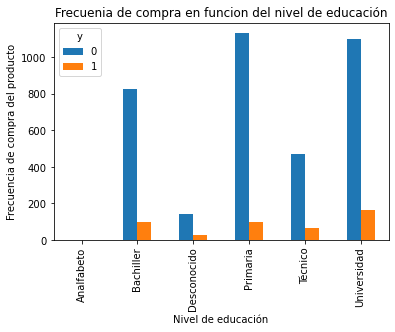

In [201]:
%matplotlib inline
pd.crosstab (datos.education, datos.y).plot(kind="bar")
plt.title("Frecuenia de compra en funcion del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel ("Frecuencia de compra del producto")


Text(0, 0.5, 'Proporción de clientes')

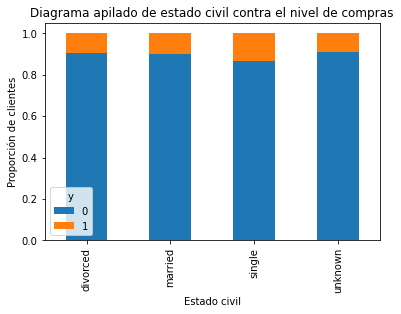

In [202]:
tabla = pd.crosstab(datos.marital, datos.y)
tabla.div(tabla.sum(1).astype(float), axis =0).plot(kind="bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

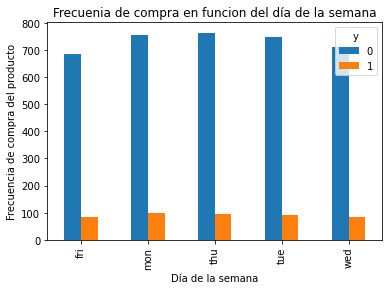

In [203]:
%matplotlib inline
pd.crosstab (datos.day_of_week, datos.y).plot(kind="bar")
plt.title("Frecuenia de compra en funcion del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel ("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

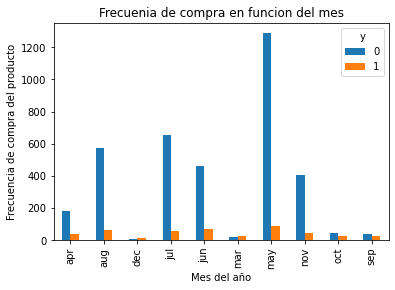

In [204]:
%matplotlib inline
pd.crosstab (datos.month, datos.y).plot(kind="bar")
plt.title("Frecuenia de compra en funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel ("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

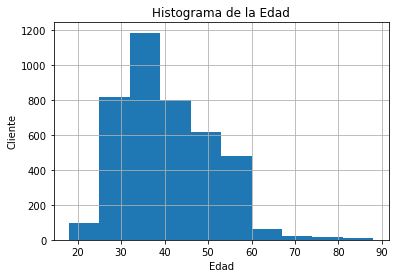

In [205]:
%matplotlib inline
datos.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel ("Cliente")

<AxesSubplot:xlabel='age'>

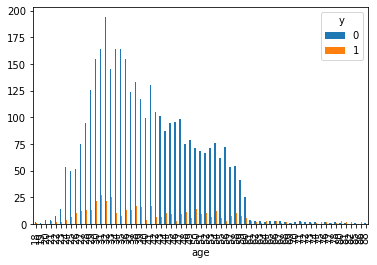

In [206]:
pd.crosstab (datos.age, datos.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

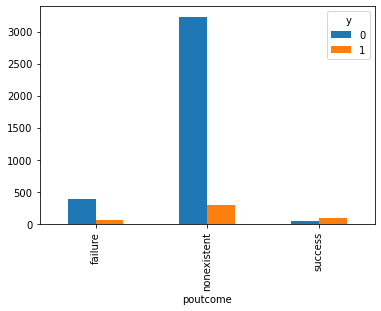

In [207]:
pd.crosstab(datos.poutcome, datos.y).plot(kind="bar")

# Conversión de variables categóricas a dummies

In [208]:
categorias = ["job", "marital", "education", "housing", "loan", "contact",
              "month", "day_of_week", "poutcome"]
for category in categorias:
    cat_list = "cat"+"_"+category
    cat_dummies = pd.get_dummies(datos[category], prefix=cat_list)
    datos_nuevos = datos.join(cat_dummies)
    datos = datos_nuevos

In [209]:
datos_variables = datos.columns.values.tolist()

In [210]:
mantener = [v for v in datos_variables if v not in categorias]
mantener = [v for v in datos_variables if v not in "default"]

In [211]:
banco_datos = datos [mantener]
banco_datos.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_marital_divorced',
       'cat_marital_married', 'cat_marital_single', 'cat_marital_unknown',
       'cat_education_Analfabeto', 'cat_education_Bachiller',
       'cat_education_Desconocido', 'cat_education_Primaria',
       'cat_education_Técnico', 'cat_education_Universidad',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_tele

In [212]:
banco_datos_variables = banco_datos.columns.values.tolist()
Y = ['y']
X = [v for v in banco_datos_variables if v not in Y]


### Selección de rasgos para el modelo

In [213]:
n = 12

In [214]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [215]:
regresion_logistica = LogisticRegression()

In [216]:
rfe = RFE(regresion_logistica, n)
#rfe = rfe.fit(banco_datos[X], banco_datos[Y].values.ravel()) #Error no solucionado

C:\Users\PC GAMER\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Implementacin del modelo en Python con statsmodel.api:

In [217]:
import  statsmodels.api as sm

In [218]:
# modelo_logistico = sm.Logit (Y,X)

In [219]:
# resultado = modelo_logistico.fit()

In [220]:
# resultado.summary2()

## Implementación del modelo en Python con scikit-learn

In [221]:
from sklearn import linear_model

In [222]:
modelo_logistico = linear_model.LogisticRegression()
#modelo_logistico.fit(X,Y)

In [223]:
#modelo_logistico.score(X,Y)

In [224]:
#1-Y.mean()

# Validación del modelo logístico

In [231]:
from sklearn.model_selection import train_test_split

In [235]:
# X_entrenamiento, X_test, Y_entrenamiento, Y_test= train_test_split(X,Y, test_size = 0.3, random_state=0)

In [238]:
#modelo_lineal = linear_model.LogisticRegression()
#modelo_lineal.fit(X_entrenamiento, y_entrenamiento)

In [239]:
#probabilidad = modelo_lineal.predict_proba(X_test)

In [240]:
#prediccion = modelo_lineal(X_test)